In [1]:
Tasmia = "In the name of Allah, the Most Benoficient, the Most Merciful"
print(Tasmia)

In the name of Allah, the Most Benoficient, the Most Merciful


### Import Libraries

In [18]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import xgboost as xgb 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

### Import Dataset

In [3]:
df = pd.read_table("fruits.txt")
df.sample(5)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
9,1,apple,braeburn,172,7.4,7.0,0.89
40,3,orange,turkey_navel,154,7.1,7.5,0.78
54,4,lemon,unknown,116,6.1,8.5,0.71
42,3,orange,turkey_navel,154,7.2,7.2,0.82
24,3,orange,spanish_jumbo,342,9.0,9.4,0.75


**Create a mapping from fruit label value to fruit name to make results easier to interpret**

In [4]:
label_fruit = dict(zip(df["fruit_label"].unique(), df["fruit_name"].unique()))
label_fruit

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

### Examining the Data

**Features and Target**

In [5]:
# Features
X = df[["mass", "width", "height", "color_score"]]

# Target
y = df["fruit_label"]

**Split data into training and test set**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 10)

**Plotting Scatter Matrix**

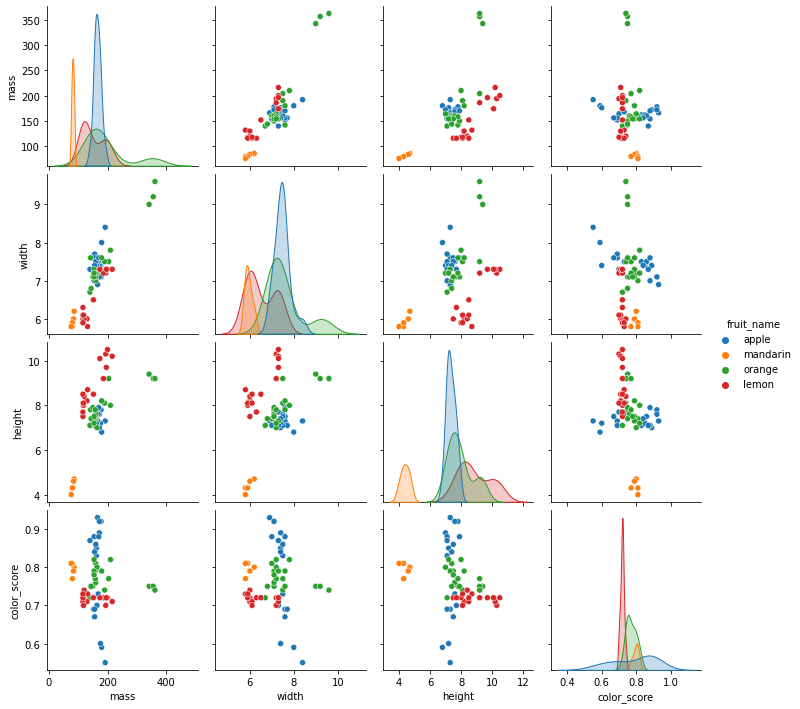

In [7]:
sns.pairplot(df[["mass", "width", "height", "color_score", "fruit_name"]], hue = "fruit_name")
plt.show()

**Plotting a 3D scatter plot**

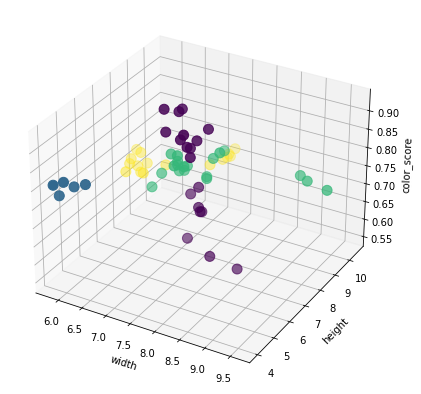

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (18, 7))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['width'], df['height'], df['color_score'], c = df["fruit_label"], marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Find Best Neighbors

In [9]:
score = []
for x in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = x)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    score.append(accuracy)
score

[0.75,
 0.75,
 0.75,
 0.75,
 0.5833333333333334,
 0.5833333333333334,
 0.5833333333333334,
 0.6666666666666666,
 0.6666666666666666]

### Perform K Neighbors Classification

In [10]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, y_train)

pred_knn = knn.predict(X_test)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_knn})

,Actual,Predicted
31,3,4
3,2,2
38,3,3
27,3,4
21,1,1
17,1,1
46,4,4
2,1,1
23,1,1
26,3,3


**Accuracy Score**

In [11]:
score = accuracy_score(y_test, pred_knn)
score

0.75

**Custom Prediction**

In [12]:
prediction = knn.predict([[110, 8.85, 5.94, 0.78]])
label_fruit[prediction[0]]

'lemon'

In [13]:
prediction2 = knn.predict([[140, 6.51, 4.38, 0.77]])
label_fruit[prediction2[0]]

'orange'

### Breast Cancer

In [14]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

**Prepare DataFrame**

In [15]:
# Features
features = pd.DataFrame(cancer.data, columns = cancer.feature_names)

# Target
target = pd.DataFrame({"Target": cancer.target})

# DataFrame
dataframe = pd.concat([features, target], axis = 1)
dataframe.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
487,19.440,18.82,128.10,1167.0,0.10890,0.14480,0.22560,0.119400,0.1823,0.06115,...,30.39,153.9,1740.0,0.1514,0.3725,0.5936,0.20600,0.3266,0.09009,0
372,21.370,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.125500,0.1973,0.06183,...,21.84,152.1,1535.0,0.1192,0.2840,0.4024,0.19660,0.2730,0.08666,0
447,14.800,17.66,95.88,674.8,0.09179,0.08890,0.04069,0.022600,0.1893,0.05886,...,22.74,105.9,829.5,0.1226,0.1881,0.2060,0.08308,0.3600,0.07285,1
532,13.680,16.33,87.76,575.5,0.09277,0.07255,0.01752,0.018800,0.1631,0.06155,...,20.20,101.6,773.4,0.1264,0.1564,0.1206,0.08704,0.2806,0.07782,1
59,8.618,11.79,54.34,224.5,0.09752,0.05272,0.02061,0.007799,0.1683,0.07187,...,15.40,59.9,274.9,0.1733,0.1239,0.1168,0.04419,0.3220,0.09026,1


**Check Cancer Classes**

In [16]:
malignant = len(dataframe[dataframe["Target"] == 0])
bengin = len(dataframe[dataframe["Target"] == 1])

tc = pd.Series([malignant, bengin], index = ["malignant", "bengin"])
tc

malignant    212
bengin       357
dtype: int64

**Extract Features and Target**

In [17]:
# Features
X = dataframe[dataframe.columns.drop("Target")]

y = dataframe["Target"]

**Split Data into training and test set**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 0)

### Find n_neighbers for Better Accuracy

In [19]:
score_knn = {}
for x in range(1, 10):
    knn_b = KNeighborsClassifier(n_neighbors = x)
    knn_b.fit(X_train, y_train)
    pred_knn = knn_b.predict(X_test)
    accuracy_b = accuracy_score(y_test, pred_knn)
    
    score_knn[x] = accuracy_b

score_knn

{1: 0.9122807017543859,
 2: 0.8947368421052632,
 3: 0.9122807017543859,
 4: 0.9210526315789473,
 5: 0.9385964912280702,
 6: 0.9385964912280702,
 7: 0.9473684210526315,
 8: 0.9473684210526315,
 9: 0.9649122807017544}

**Actual and Predicted values output**

In [20]:
knn = KNeighborsClassifier(n_neighbors = 9)

knn.fit(X_train, y_train)

pred_k = knn.predict(X_test)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_k})[::10]

,Actual,Predicted
512,0,0
421,1,1
31,0,0
179,1,1
414,0,0
12,0,0
196,0,0
340,1,1
566,0,0
21,1,1


**Actual and Predicted values graph**

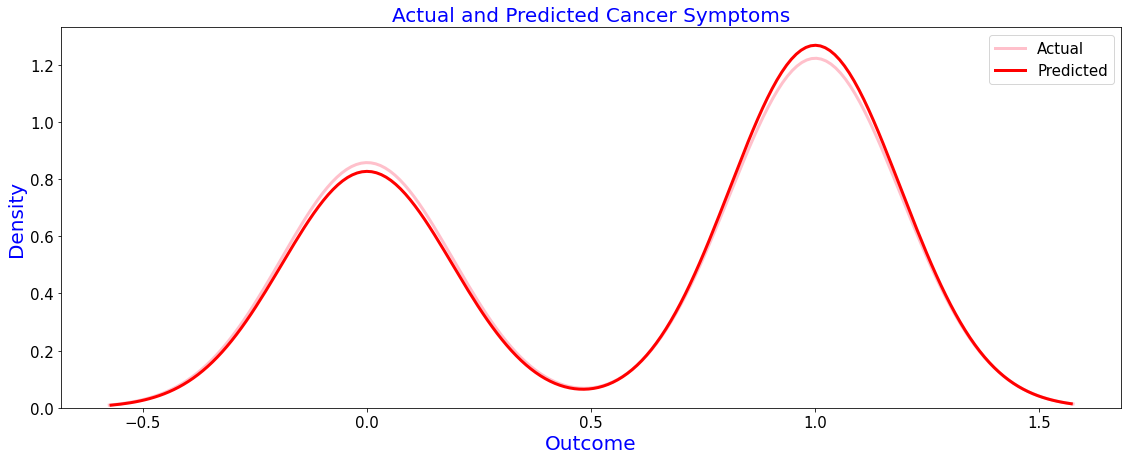

In [21]:
plt.figure(figsize = (19, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "pink")
sns.kdeplot(x = pred_k, label = "Predicted", linewidth = 3, color = "red")
plt.title("Actual and Predicted Cancer Symptoms", size = 20, color = "blue")
plt.xlabel("Outcome", size = 20, color = "blue")
plt.ylabel("Density", size = 20, color = "blue")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})
plt.show()

### Mashroom Classification

In [22]:
df = pd.read_csv("mashrooms.csv")
df.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
70,e,f,f,y,t,l,f,w,n,p,...,s,w,w,p,w,o,p,n,v,d
6210,p,f,y,e,f,f,f,c,n,b,...,k,p,w,p,w,o,e,w,v,p
2708,e,x,y,n,t,n,f,c,b,n,...,s,p,g,p,w,o,p,k,y,d
4683,p,f,f,y,f,f,f,c,b,g,...,k,n,p,p,w,o,l,h,y,p
3687,p,x,f,w,f,c,f,c,n,n,...,s,w,w,p,w,o,p,n,s,d


**Define features and target**

In [23]:
# Features
X = df[df.columns.drop("class")]

# Target
y = df["class"]

**Get dummy variables**

In [24]:
X = pd.get_dummies(X)
X.sample(5)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
5641,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
2660,0,0,0,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1630,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2352,0,0,0,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
8062,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


**Split data into training and test set**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 0,
                                                    test_size = 0.2,
                                                    stratify = y)

**Find 5 features with greater feature importance**

In [26]:
dt = DecisionTreeClassifier(random_state = 0)

dt.fit(X_train, y_train)

fi = pd.DataFrame({"Features": X.columns,
                   "Importance": dt.feature_importances_})

fi.sort_values(by = "Importance", ascending = False).head(5)

,Features,Importance
27,odor_n,0.614017
53,stalk-root_c,0.180414
55,stalk-root_r,0.088393
100,spore-print-color_r,0.034025
22,odor_a,0.023233


### Select features and target to apply Support Vector Classification

In [27]:
features = X[["odor_n", "stalk-root_c", "stalk-root_r", "spore-print-color_r", "odor_a"]]

target = y

**Split data into training and test set**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    stratify = target)

**Find Best Parameters**

In [29]:
parameters = {"kernel": ["linear", "poly", "rbf", "sigmoid"],
              "C": [0.001, 0.01, 1, 100, 1000]}

SVM = SVC()

cv = GridSearchCV(SVM, parameters)

cv.fit(X_train, y_train)

cv.best_params_

{'C': 1, 'kernel': 'poly'}

### Support Vector Classification

In [30]:
svc_m = SVC(kernel = "poly", C = 1)

svc_m.fit(X_train, y_train)

pred_svm = svc_m.predict(X_test)

pd.DataFrame({"Actual": y_test,
              "Predicted": pred_svm}).sample(10)

,Actual,Predicted
964,e,e
7311,e,e
6317,p,p
1221,e,e
7849,p,p
4268,p,p
1459,p,p
6091,p,p
7675,p,p
5801,p,p


**Accuracy**

In [31]:
score = accuracy_score(y_test, pred_svm)
score

0.9821538461538462

**Custom Prediction**

In [32]:
print("Custom Prediction of SVM =", svc_m.predict([[1, 0, 1, 1, 1]]))

Custom Prediction of SVM = ['e']


# Model Evaluation

In [33]:
from sklearn.datasets import load_digits
digits = load_digits()

**Prepare Features and Targets**

In [34]:
features = pd.DataFrame(digits.data, columns = digits.feature_names)

target = pd.DataFrame({"Target": digits.target})

**Combine to made a dataframe**

In [35]:
df = pd.concat([features, target], axis = 1)
df.sample(5)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
1280,0.0,0.0,13.0,16.0,16.0,15.0,2.0,0.0,0.0,0.0,...,0.0,0.0,1.0,13.0,16.0,15.0,3.0,0.0,0.0,8
1703,0.0,0.0,4.0,14.0,11.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,15.0,12.0,2.0,0.0,0.0,0
615,0.0,0.0,5.0,16.0,14.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,16.0,16.0,3.0,0.0,1
1214,0.0,1.0,10.0,15.0,15.0,5.0,0.0,0.0,0.0,11.0,...,1.0,0.0,1.0,15.0,16.0,16.0,12.0,5.0,0.0,2
402,0.0,0.0,2.0,11.0,13.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,10.0,16.0,7.0,0.0,0.0,6


**Check Classes**

In [36]:
df["Target"].value_counts().sort_index()

0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: Target, dtype: int64

**Class Imbalance**

In [37]:
def num(x):
    if x == 1:
        return 1
    else:
        return 0
    
df["Target"] = df["Target"].apply(num)
df["Target"].value_counts()

0    1615
1     182
Name: Target, dtype: int64

**Prepare features and target**

In [38]:
# Features
X = df[df.columns.drop("Target")]

# Target
y = df["Target"]

**Split data into training and test set**

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    stratify = y)

**find best params**

In [40]:
parameters = {"kernel": ["linear", "poly", "rbf", "sigmoid"],
              "C": [0.001, 0.01, 1, 100, 1000]}

svm_d = SVC()

cv_d = GridSearchCV(svm_d, parameters)

cv_d.fit(X_train, y_train)

cv_d.best_params_

{'C': 1, 'kernel': 'poly'}

In [41]:
svm = SVC(kernel = "poly", C = 1)

svm.fit(X_train, y_train)

svm_dp = svm.predict(X_test)

pd.DataFrame({"Actual": y_test,
                       "Predicted": svm_dp}).sample(5)

,Actual,Predicted
1180,0,0
650,0,0
1737,1,1
496,0,0
597,0,0


**Confusion Matrix**

In [42]:
pd.DataFrame(confusion_matrix(y_test, svm_dp))

,0,1
0,323,1
1,0,36


**Accuracy**

In [43]:
accuracy_score(y_test, svm_dp)

0.9972222222222222

### Regression Evaluation

In [44]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

**Prepare features and target**

In [45]:
features = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)

target = pd.DataFrame({"Target": diabetes.target})

df = pd.concat([features, target], axis = 1)

df.sample(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
88,-0.052738,0.050680,-0.040696,-0.067642,-0.031840,-0.037013,0.037595,-0.039493,-0.034524,0.069338,42.0
86,-0.070900,0.050680,-0.075186,-0.040099,-0.051103,-0.015092,-0.039719,-0.002592,-0.096433,-0.034215,55.0
97,-0.027310,-0.044642,0.088642,-0.025180,0.021822,0.042527,-0.032356,0.034309,0.002864,0.077622,279.0
50,0.034443,-0.044642,-0.007284,0.014987,-0.044223,-0.037326,-0.002903,-0.039493,-0.021394,0.007207,155.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0


**Separate features and target**

In [46]:
X = df[df.columns.drop("Target")]

y = df["Target"]

**Split data into training and test set**

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 0)

### Support Vector Regression

In [48]:
parameters = {"kernel": ["linear", "poly", "rbf"],
              "C": [0.001, 0.01, 0.1, 1, 100, 1000]}

svm_r = SVR()

cv = GridSearchCV(svm_r, parameters)

cv.fit(X_train, y_train)

cv.best_params_

{'C': 1000, 'kernel': 'linear'}

In [49]:
svr = SVR(kernel = "linear", C = 1000)

svr.fit(X_train, y_train)

pred_svr = svr.predict(X_test)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_svr}).sample(10)

,Actual,Predicted
205,99.0,238.847774
233,90.0,143.113348
78,252.0,177.428262
400,175.0,200.746413
170,47.0,47.336238
132,107.0,102.238375
124,121.0,178.263885
56,52.0,215.992627
213,49.0,103.210156
118,179.0,159.737766


In [50]:
score = MSE(y_test, pred_svr)**(0.5)
score

59.502981396634276

### K Neighbors Regression

In [51]:
parameters = {"n_neighbors": range(1, 10)}

knr = KNeighborsRegressor()

cv_knr = GridSearchCV(knr, parameters)

cv_knr.fit(X_train, y_train)

cv_knr.best_params_

{'n_neighbors': 8}

In [52]:
KNR = KNeighborsRegressor(n_neighbors = 8)

KNR.fit(X_train, y_train)

pred_knr = KNR.predict(X_test)
score = MSE(y_test, pred_knr)**(0.5)
score

63.28699316773932

### Fraud Detection

In [5]:
df = pd.read_csv("fraud.csv")
df.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
13565,-0.465396,1.055488,1.687682,-0.107551,-0.052681,-0.676691,0.645301,0.031432,-0.765788,-0.160831,...,-0.156705,-0.391740,-0.021567,0.534176,-0.230532,0.039013,0.266660,0.114095,0.99,0
17975,1.930509,0.589877,-0.573178,4.011452,0.646176,0.406016,0.003458,-0.104042,0.606845,0.995024,...,-0.084729,0.160308,0.110852,0.603596,0.152945,0.028829,-0.056768,-0.050443,7.55,0
5385,1.184809,-0.162581,0.801492,0.960531,-0.404912,0.782065,-0.719300,0.342308,0.791953,-0.017296,...,-0.091418,-0.121372,-0.157832,-0.841701,0.521427,-0.352885,0.062966,0.015808,12.99,0
19707,1.266321,0.558857,-0.097331,1.102210,0.123727,-1.167374,0.631145,-0.416871,-0.438380,0.011941,...,0.018624,0.149541,-0.162974,0.435542,0.885922,-0.300606,-0.002185,0.014243,7.49,0
10,0.349277,-2.539493,0.645773,-0.503734,-1.792852,0.986512,-0.927262,0.219743,4.583702,-1.996804,...,0.105308,0.028927,-0.741057,-0.965756,0.491041,0.314925,-0.031749,0.089022,488.99,0


**Instances of fraud**

In [6]:
df["Class"].value_counts(normalize = True).round(2)

0    0.98
1    0.02
Name: Class, dtype: float64

**Separate features and target**

In [7]:
# Features
X = df[df.columns.drop("Class")]

# Target
y = df["Class"]

**Split data into training and test set**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify = y)

### Support Vector Classification (default parameters)

In [9]:
svc = SVC()

svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)
pd.DataFrame({"Actual": y_test,
              "Predicted": svc_pred}).sample(5)

,Actual,Predicted
561,0,0
16521,0,0
7062,0,0
16102,0,0
9781,0,0


**Confusion Matrix**

In [10]:
pd.DataFrame(confusion_matrix(y_test, svc_pred), columns = ["Actual 0", "Actual 1"], index = ["Predicted 0", "Predicted 1"])

,Actual 0,Actual 1
Predicted 0,4267,1
Predicted 1,52,19


**Classification Report**

In [11]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4268
           1       0.95      0.27      0.42        71

    accuracy                           0.99      4339
   macro avg       0.97      0.63      0.71      4339
weighted avg       0.99      0.99      0.98      4339



### SVC with parameters

In [12]:
svc = SVC(C = 100000000, gamma = 0.0000001)

svc.fit(X_train, y_train)

pred_s = svc.predict(X_test)

pd.DataFrame({"Actual": y_test,
              "Predicted": pred_s}).sample(5)

,Actual,Predicted
4863,0,0
11796,0,0
20757,0,0
14255,0,0
827,0,0


**Confusion Matrix**

In [13]:
pd.DataFrame(confusion_matrix(y_test, pred_s), columns = ["Actual 0", "Actual 1"], index = ["Predicted 0", "Predicted 1"])

,Actual 0,Actual 1
Predicted 0,4265,3
Predicted 1,17,54


**Classification Report**

In [14]:
print(classification_report(y_test, pred_s))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4268
           1       0.95      0.76      0.84        71

    accuracy                           1.00      4339
   macro avg       0.97      0.88      0.92      4339
weighted avg       1.00      1.00      1.00      4339



### Logistic Regression

In [19]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

pred_log = log_reg.predict(X_test)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_log}).sample(10)

,Actual,Predicted
19798,0,0
20163,0,0
11398,0,0
8616,0,0
9599,0,0
11559,0,0
8819,0,0
8559,0,0
12408,0,0
11171,0,0


**Confusion Matrix**

In [20]:
pd.DataFrame(confusion_matrix(y_test, pred_log), columns = ["Actual 0", "Actual 1"], index = ["Predicted 0", "Predicted 1"])

,Actual 0,Actual 1
Predicted 0,4265,3
Predicted 1,15,56


**Classification Report**

In [21]:
print(classification_report(y_test, pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4268
           1       0.95      0.79      0.86        71

    accuracy                           1.00      4339
   macro avg       0.97      0.89      0.93      4339
weighted avg       1.00      1.00      1.00      4339



### Find Best Parameters

In [23]:
parameters = {'penalty': ['l1', 'l2'],
              'C':[0.01, 0.1, 1, 10, 100]}

log = LogisticRegression()

cv = GridSearchCV(log, parameters)

cv.fit(X_train, y_train)

cv.best_params_

{'C': 0.01, 'penalty': 'l2'}

**Logistic Regression with Parameters**

In [25]:
logr = LogisticRegression(C = 0.01,
                          penalty = 'l2')

logr.fit(X_train, y_train)

predlog = logr.predict(X_test)
pd.DataFrame({"Actual": y_test,
              "Predicted": predlog}).sample(10)

,Actual,Predicted
5814,0,0
3159,0,0
12590,0,0
7967,0,0
290,0,0
19742,0,0
7572,0,0
4115,0,0
4981,0,0
19382,0,0


**Confusion Matrix**

In [26]:
pd.DataFrame(confusion_matrix(y_test, predlog), columns = ["Actual 0", "Actual 1"], index = ["Predicted 0", "Predicted 1"])

,Actual 0,Actual 1
Predicted 0,4266,2
Predicted 1,19,52


**Classification Report**

In [27]:
print(classification_report(y_test, predlog))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4268
           1       0.96      0.73      0.83        71

    accuracy                           1.00      4339
   macro avg       0.98      0.87      0.91      4339
weighted avg       1.00      1.00      0.99      4339

